In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import mnist
from os import listdir
from os.path import isfile, join
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from matplotlib import pyplot
from google.colab import drive
import cv2
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout , Input , Flatten , Conv2D , MaxPooling2D, BatchNormalization, Activation
from keras.callbacks import EarlyStopping , ModelCheckpoint
from keras.optimizers import Adam, SGD, RMSprop

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import os


def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.resize(img,(150,150))
        #hsvim = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
        if img is not None:
            images.append(img)
    return images

In [ ]:
def file_name(folder):
  file_name = []
  for filename in os.listdir(folder):
    file_name.append(filename)
  return file_name

In [ ]:
Dirty0 = load_images_from_folder('drive/MyDrive/FW_DF')
Clean0 = load_images_from_folder('drive/MyDrive/E.coli_HF_DF')
Dirty1 = load_images_from_folder('drive/MyDrive/EColi_Optical Microscope (1000X)')
Clean1 = load_images_from_folder('drive/MyDrive/Filtered Water (FW)')
Dirty2 = load_images_from_folder('drive/MyDrive/EColi_Foldscope (140X)')
Dirty3 = load_images_from_folder('drive/MyDrive/EColi_Optical Microscope (100X)')

In [ ]:
Dirty = Dirty0 + Dirty1 + Dirty2 + Dirty3
Clean = Clean0 + Clean1

In [ ]:
label0 = []
for i in range(len(Dirty)):
  label0.append(0)

label1 = []
for j in range(len(Clean)):
  label1.append(1)

In [ ]:
dataset = Dirty + Clean
label = label0 + label1
#del Dirty
#del Clean

In [ ]:
import random
mapIndexPosition = list(zip(dataset, label))
random.shuffle(mapIndexPosition)
# make list separate
dataset, label = zip(*mapIndexPosition)

In [ ]:
input_shape = dataset[0].shape
print(input_shape)

(150, 150, 3)


In [ ]:
dataset = np.array(dataset)
label = np.array(label)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size=0.3)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
'''mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_train = (x_train-mean)/(std+1e-7)'''

'mean = np.mean(x_train,axis=(0,1,2,3))\nstd = np.std(x_train,axis=(0,1,2,3))\nx_train = (x_train-mean)/(std+1e-7)\nx_train = (x_train-mean)/(std+1e-7)'

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
num_classes = 2
input_shape = (150, 150, 3)

In [ ]:
x_train.shape

(695, 150, 150, 3)

In [ ]:
base_model = keras.applications.Xception(weights='imagenet',input_shape=(150, 150, 3),include_top=False)
base_model.trainable = True
# model_1
model1_in = keras.Input(shape=input_shape)
x = base_model(model1_in, training=True)
x = layers.Conv2D(16,(2,2),padding='same', activation='relu')(model1_in)
x = layers.Conv2D(16,(2,2), activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.01)(x)
x = layers.Conv2D(32,(2,2),padding='same', activation='relu')(x)
x = layers.Conv2D(32,(2,2), activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)
x = layers.Dropout(0.01)(x)
x = layers.Conv2D(64,(2,2),padding='same', activation='relu')(x)
x = layers.Conv2D(64,(2,2), activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)
x = layers.Dropout(0.01)(x)
x = layers.Conv2D(128,(2,2),padding='same', activation='relu')(x)
x = layers.Conv2D(128,(2,2), activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation='relu')(x)
x = layers.Dropout(0.01)(x)
x = layers.Dense(8, activation='relu')(x)
x = layers.Dropout(0.01)(x)
x = layers.Dense(4, activation='relu')(x)
x = layers.Dropout(0.01)(x)
model1_out = layers.Dense(2, activation='sigmoid')(x)

model = keras.Model(model1_in, model1_out)


def lr_scheduler(epoch, lr):
    decay_rate = 0.01
    decay_step = 90
    if epoch % decay_step == 0 and epoch:
        return lr * decay_rate
    return lr

model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

checkpoint = ModelCheckpoint('weights.h5', monitor='val_loss',save_best_only=True, verbose=2)
early_stopping = EarlyStopping(monitor="val_loss", patience=20)

final = model.fit(x_train, y=y_train, batch_size=32, epochs=100,verbose=1,validation_split=0.2,callbacks=[early_stopping,keras.callbacks.LearningRateScheduler(lr_scheduler, verbose=1)])

83689472/83683744 [==============================] - 1s 0us/step
Epoch 1/100

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
18/18 [==============================] - 35s 83ms/step - loss: 0.7782 - accuracy: 0.5394 - val_loss: 0.6895 - val_accuracy: 0.7410
Epoch 2/100

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
18/18 [==============================] - 1s 34ms/step - loss: 0.6900 - accuracy: 0.6689 - val_loss: 0.6860 - val_accuracy: 0.7410
Epoch 3/100

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
18/18 [==============================] - 1s 33ms/step - loss: 0.6915 - accuracy: 0.6622 - val_loss: 0.6827 - val_accuracy: 0.7410
Epoch 4/100

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
18/18 [==============================] - 1s 33ms/step - loss: 0.6856 - accuracy: 0.6606 - val_loss: 0.6792 - val_accuracy: 0.7410
Epoch 5/100

Epoch 00005: 

In [ ]:
model.save('model.h5')

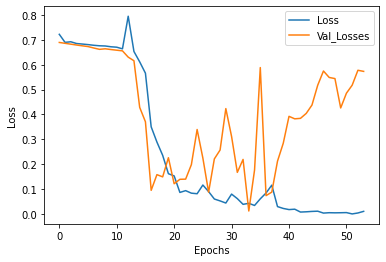

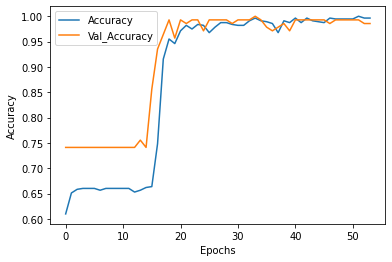

In [ ]:
history=final.history

losses=history['loss']
val_losses=history['val_loss']
accuracies=history['accuracy']
val_accuracies=history['val_accuracy']
# plotting the loss and the accuracy
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(losses)
plt.plot(val_losses)
plt.legend(['Loss','Val_Losses'])
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(accuracies)
plt.plot(val_accuracies)
plt.legend(['Accuracy','Val_Accuracy'])
plt.show()

In [ ]:
'''model = keras.Sequential(
    [
        layers.Input(shape=input_shape),
        layers.Conv2D(8,(2,2),padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=(1, 1)),
        layers.Conv2D(16,(2,2), activation='relu'),
        layers.MaxPooling2D(pool_size=(1, 1)),
        layers.Conv2D(8,(2,2), activation='relu'),
        layers.MaxPooling2D(pool_size=(1, 1)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)'''

'model = keras.Sequential(\n    [\n        layers.Input(shape=input_shape),\n        layers.Conv2D(8,(2,2),padding=\'same\', activation=\'relu\'),\n        layers.MaxPooling2D(pool_size=(1, 1)),\n        layers.Conv2D(16,(2,2), activation=\'relu\'),\n        layers.MaxPooling2D(pool_size=(1, 1)),\n        layers.Conv2D(8,(2,2), activation=\'relu\'),\n        layers.MaxPooling2D(pool_size=(1, 1)),\n        layers.Flatten(),\n        layers.Dropout(0.5),\n        layers.Dense(num_classes, activation="softmax"),\n    ]\n)'

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 150, 150, 16)      208       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 149, 149, 16)      1040      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 74, 74, 32)        2080      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 73, 73, 32)        4128  

In [ ]:
result = np.argmax(model.predict(x_test, verbose=1), axis=1)

10/10 [==============================] - 0s 10ms/step


In [ ]:
model.evaluate(x_test, y_test)

10/10 [==============================] - 0s 10ms/step - loss: 0.4071 - accuracy: 0.9967


[0.4070989191532135, 0.9966555237770081]

## Classification Report

In [ ]:
from sklearn.metrics import classification_report
score = model.evaluate(x_test, y_test, verbose=0)
'''print('Test score:', score[0])
print('Test accuracy:', score[1])
print('Test precision:', score[2])
print('Test recall:', score[3])'''

# evaluate model with sklearn
predictions_last_epoch = model.predict(x_test, verbose=1)
target_names = ['class 0(Dirty)', 'class 1(Clean)']

y_test_ = np.argmax(y_test, axis=1)

predicted_classes = np.argmax(predictions_last_epoch, axis=1)
print(predicted_classes)
print('\n')
print(classification_report(y_test_, predicted_classes, target_names=target_names))

# XGBoost

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16


SIZE = 150  #Resize images


#Convert lists to arrays        
train_images = dataset[:800]
train_labels = label[:800]


#Convert lists to arrays                
test_images = dataset[800:]
test_labels = label[800:]

#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

###################################################################
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

#One hot encode y values for neural network. 
# from keras.utils import to_categorical
# y_train_one_hot = to_categorical(y_train)
# y_test_one_hot = to_categorical(y_test)

#############################
#Load model wothout classifier/fully connected layers
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
	layer.trainable = False
    
VGG_model.summary()  #Trainable parameters will be 0


#Now, let us use features from convolutional network for RF
feature_extractor=VGG_model.predict(x_train)

features = feature_extractor.reshape(feature_extractor.shape[0], -1)

X_for_training = features #This is our X input to RF

#RANDOM FOREST
#from sklearn.ensemble import RandomForestClassifier
#model = RandomForestClassifier(n_estimators = 50, random_state = 42)

# Train the model on training data


#XGBOOST
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_for_training, y_train) #For sklearn no one hot encoding

#Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

#Now predict using the trained RF model. 
prediction = model.predict(X_test_features)
#Inverse le transform to get original label back. 
prediction = le.inverse_transform(prediction)

#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction))

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction)
#print(cm)
sns.heatmap(cm, annot=True)

#Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction = model.predict(input_img_features)[0] 
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

In [ ]:
# saving XGBoost model
model.save_model('XGBoost_EcoFilter.json')

In [ ]:
# loading XGBoost model
xgb_model_latest = xgb.XGBClassifier()

xgb_model_latest.load_model("XGBoost_EcoFilter.json")

## **Image Registration**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, io
from skimage.feature import register_translation
from skimage.feature.register_translation import _upsampled_dft
from scipy.ndimage import fourier_shift

image = Dirty2[0]
offset_image = Dirty1[0]
# offset image translated by (-17.45, 18.75) in y and x 

# subpixel precision
#Upsample factor 100 = images will be registered to within 1/100th of a pixel.
#Default is 1 which means no upsampling.  
shifted, error, diffphase = register_translation(image, offset_image, 100)
print(f"Detected subpixel offset (y, x): {shifted}")

from scipy.ndimage import shift
corrected_image = shift(offset_image, shift=(shifted[0], shifted[1], 0), mode='constant')
#plt.imshow(corrected_image)
cv2.imwrite('shifted.jpg',corrected_image)
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(image, cmap='gray')
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(offset_image, cmap='gray')
ax2.title.set_text('Offset image')
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(corrected_image, cmap='gray')
ax3.title.set_text('Corrected')
plt.show()

## **Calculate MSE & SSIM**

In [ ]:
# USAGE
# python compare.py

# import the necessary packages
from skimage import measure
import matplotlib.pyplot as plt
import numpy as np
import cv2

def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

def compare_images(imageA, imageB, title):
	# compute the mean squared error and structural similarity
	# index for the images
	m = mse(imageA, imageB)
	s = measure.compare_ssim(imageA, imageB, multichannel=True)

	# setup the figure
	fig = plt.figure(title)
	plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))

	# show first image
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageA, cmap = plt.cm.gray)
	plt.axis("off")

	# show the second image
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB, cmap = plt.cm.gray)
	plt.axis("off")

	# show the images
	plt.show()

# load the images -- the original, the original + contrast,
# and the original + photoshop
original = cv2.imread("shifted.jpg")
contrast = Dirty2[0]
#shopped = Dirty0[0]

# convert the images to grayscale
#original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
#contrast = cv2.cvtColor(contrast, cv2.COLOR_BGR2GRAY)
#shopped = cv2.cvtColor(shopped, cv2.COLOR_BGR2GRAY)

# initialize the figure
fig = plt.figure("Images")
images = ("Original", original), ("Contrast", contrast)

# loop over the images
for (i, (name, image)) in enumerate(images):
	# show the image
	ax = fig.add_subplot(1, 2, i + 1)
	ax.set_title(name)
	plt.imshow(image, cmap = plt.cm.gray)
	plt.axis("off")

# show the figure
plt.show()

# compare the images
#compare_images(original, original, "Original vs. Original")
compare_images(original, contrast, "Original vs. Contrast")
#compare_images(original, shopped, "Original vs. Photoshopped")